In [7]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [8]:
csfont = {'fontname':'Arial'}


In [9]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/all_data.csv"

In [10]:
df = pd.read_csv(path_to_file, header=None, index_col=0)
df2 = df.rename(columns={1:'gene'}, inplace=False)


In [11]:
pd.set_option('display.max_rows', 500)


In [12]:
df2.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
2,gene,fast_glu_anal,hr_glu_anal,ln_fast_ins_anal,ln_hr_ins_anal,ldl_anal,tchol_anal,hdl_anal,ln_tg_anal,sbp_anal,dbp_anal,ln_creat_anal,ln_bmi_anal
2,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
2,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
2,IFNG,0.88302,0.10996,0.57891,0.45358,0.60859,0.20033,0.34672,0.4963,0.093361,0.025266,0.10684,0.044815


In [13]:
path_to_file_2 = "/Users/aditgupta/Google Drive/Research/T2D/gluc_high.csv"

In [14]:
df3 = pd.read_csv(path_to_file_2, header=None, index_col=0)

In [15]:
df3
df4 = df3.rename(columns={1:'gene'}, inplace=False)


In [16]:
df6 = df4.dropna()
len(df6['gene'].unique())

96

In [17]:
df5 = pd.merge(df2, df6, on='gene', how='inner')
df5.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
1,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
3,XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
4,ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762


In [18]:
df7 = df5.dropna(subset = ['gene'])
wanted = df7['gene'].unique()

In [19]:
string_to_write = "\n".join(wanted)
with open("wanted_20.txt", "w") as f:
    f.write(string_to_write)

In [20]:
df5 = df5.set_index("gene")

In [21]:
df5.head()

,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,
KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762


In [22]:
df5 = df5.astype(np.float32)

In [23]:
bmi_gluc_synthetic = np.array([0.00079371,0.0038529, 0.0038692, 0.011781, 0.016211, 0.020746,0.023691,0.025932,0.031883,0.03346,0.034047,0.042854,0.045173,0.050497,0.050799, 0.052086,0.052312,0.057919,0.064807,0.071449,0.076924,0.077906,0.082264,0.089912,0.091958,0.1219,0.12432,0.13278,0.1383,0.14031,0.14055,0.14078,0.1431,0.14611,0.14673,0.14708,0.16128,0.16421,0.16679,0.16906,0.17604,0.1802,0.18065,0.18321,0.18527,0.20456,0.20575,0.20709,0.21287,0.21325,0.21722,0.21781,0.23288,0.23341,0.23601,0.2409,0.24554,0.24683,0.25484,0.25776,0.27397,0.28105,0.29017,0.29022,0.29842,0.29855,0.30654,0.31335,0.37021,0.39238,0.39683,0.40993,0.41709,0.42105, 0.42813,0.43352,0.46393,0.47006,0.49413,0.50238,0.51816,0.54151,0.5448,0.55668,0.56105,0.56837,0.58265,0.58482,0.58714, 0.65654, 0.748320,.87922])

In [24]:
fast_insulin_gluc_synthetic = np.array([0.001082,0.0016243,0.0032657,0.00684,0.020092,0.020111,0.025561,0.027516,0.03451,0.039758,0.039967,0.040977,0.043761,0.045895,0.046694,0.059579,0.062997,0.064848,0.066645,0.075656,0.079519,0.081533,0.082935,0.085064,0.092022,0.095618,0.1207,0.13698,0.14036,0.14585,0.15562,0.15628,0.15647,0.16976,0.17064,0.17182,0.17717,0.18694,0.18819,0.19511,0.20046,0.20225,0.21469,0.22138,0.22344,0.23146,0.2511,0.25628,0.26565,0.2745,0.28223,0.28629,0.28879,0.31492,0.31855,0.32806,0.33531,0.34331,0.3453,0.34985,0.35149,0.35653,0.36748,0.37015,0.37892,0.38481,0.39798,0.44337,0.44639,0.45117,0.45477,0.45665,0.49636,0.51422,0.52191,0.53849,0.54477,0.54534,0.54534,0.58669,0.59918,0.6225,0.64193,0.64866,0.68637,0.68832,0.69885,0.79252,0.79313,0.83817,0.87012,0.92403])

In [25]:
dbp_gluc_synthetic = ([0.000000022889,	0.00004608,	0.000066945,	0.0002258,	0.0034237,	0.0061159,	0.0086051,	0.012321,	0.01724,	0.017506,	0.017629,	0.021403,	0.022644,	0.026643,	0.027507,	0.03064,	0.032194,	0.037891,	0.040311,	0.042834,	0.04507,	0.056788,	0.062628,	0.066,	0.070895,	0.078396,	0.079644,	0.080668,	0.084587,	0.094796,	0.1066,	0.12505,	0.12693,	0.13653,	0.13683,	0.1392,	0.14274,	0.14772,	0.14832,	0.15009,	0.1518,	0.15524,	0.15786,	0.15886,	0.16933,	0.17196,	0.2014,	0.21268,	0.21477,	0.21887,0.23124,	0.2318,	0.24528,	0.26021,	0.30421,	0.31021,	0.32456,	0.32985,	0.3318,	0.3325,	0.34769,	0.377,	0.40029,	0.41799,	0.42065,	0.43235,	0.43409,	0.43653,	0.44024,	0.44377,	0.44631,	0.4549,	0.46191,	0.50597,	0.50714,	0.51038,	0.51911,	0.53315,	0.55076,	0.55447,	0.59437,	0.59619,	0.62384,	0.64004,	0.64375,	0.64566,	0.69843,	0.71624,	0.81511,	0.81722,	0.83469])

In [26]:
ldl_gluc_synthetic =np.array([0.00002271,	0.0019724,	0.005225,	0.0070993,	0.013821,	0.017698,	0.03205,	0.03318,	0.034652,	0.037375,	0.037776,	0.04262,	0.045844,0.050506,0.096049,0.098175,0.10914,0.11107,0.16091,0.23101,0.23298,0.23688,0.25183,	0.2586,	0.25892,	0.26087,	0.26893,	0.27817,	0.28713,	0.29328,	0.29358,	0.29782,	0.32235,	0.34152,	0.35174,	0.39349,	0.39484,	0.40354,	0.41942,	0.42151,	0.43616,	0.45121,	0.45228,	0.47121,	0.47167,	0.49364,	0.5025,	0.50697,	0.51358,	0.54785,	0.59367,	0.60314,	0.62833,	0.63492,	0.637,	0.64312,	0.66987,	0.67492,	0.68715,	0.6919,	0.72561,	0.74419,	0.75256,0.12762,	0.1279,	0.13506,	0.13528,	0.14069,	0.1432,	0.14763,	0.14808,0.16969,	0.1757,	0.17892,	0.18104,	0.18112,	0.18771,	0.1918,	0.19445,	0.19961,	0.20277,	0.20388,	0.21006])

In [27]:
tchol_gluc_synthetic =np.array([0.023028,	0.023683,	0.026275,	0.031553,	0.032482,	0.035409,	0.038646,	0.041231,	0.046382,	0.049498,	0.054506,	0.055462,	0.097696,	0.10244,	0.10808,	0.11001,	0.11381,	0.1142,	0.12707,	0.1356,	0.14404,	0.14808,	0.15112,	0.15915,	0.16164,	0.16975,	0.17258,	0.17305,	0.17337,	0.17342,	0.17353,	0.17852,	0.18006,	0.18441,	0.18741,	0.19407,	0.19647,	0.20878,	0.21196,	0.21308,	0.21341,	0.22538,	0.22932,	0.23079,	0.2417,	0.24209,	0.25252,	0.25433,	0.27156,	0.27684,	0.27796,	0.28458,	0.29853,	0.30725,	0.31642,	0.31672,	0.32243,	0.33219,	0.34027,	0.34237,	0.34865,	0.35036,	0.35198,	0.35441,	0.36353,	0.38926,	0.3925,	0.39485,	0.41315,	0.41611,	0.42713,	0.43154,	0.43228,	0.43302,	0.43525,	0.43619,	0.43739,	0.44447,	0.44666,	0.47071,	0.47168,	0.47193,	0.47544,	0.47868,	0.48809,	0.49194,	0.50818,	0.50962,	0.58622,	0.60451,	0.73482,	0.85624])

In [28]:
hdl_gluc_synthetic =np.array([0.098361,	0.066153,	0.066483,	0.73544,	0.14936,	0.19958,	0.12333,	0.11651,	0.29146,	0.069835,	0.035409,	0.25605,	0.42427,	0.44147,	0.036447,	0.26571,	0.10014,	0.091901,	0.071734,	0.38826,	0.23722,	0.48133,	0.33148,	0.65326,	0.36712,	0.85703,	0.12853,	0.2985,	0.038334,	0.46802,	0.85984,	0.0084627,	0.10472,	0.39528,	0.014911,	0.50841,	0.031439,	0.52614,	0.24461,	0.071374,	0.20604,	0.23969,	0.0060076,	0.01476,	0.017621,	0.32182,	0.27989,	0.40879,	0.18327,	0.57533,	0.12175,	0.4216,	0.31119,	0.13936,	0.16718,	0.034834,	0.1032,	0.44723,	0.18294,	0.040425,	0.23195,	0.097182,	0.21658,	0.30095,	0.22983,	0.08572,	0.075104,	0.77831,	0.041199,	0.28124,	0.071699,	0.60126,	0.14164,	0.79716,	0.00035122,	0.31502,	0.04301,	0.49415,	0.093162,	0.015632,	0.31945,	0.097043,	0.34465,	0.013148,	0.37818,	0.62219,	0.041031,	0.61567,	0.3438,	0.6198,	0.47903,	0.25406])

In [29]:
tg_gluc_synthetic =np.array([0.30484,	0.52646,	0.15841,	0.31778,	0.61474,	0.29907,	0.12333,	0.11651,	0.44293,	0.0062816,	0.13047,	0.20328,	0.31427,	0.38884,	0.53637,	0.47601,	0.10014,	0.13773,	0.17914,	0.2951,	0.23722,	0.28185,	0.1559,	0.26536,	0.47147,	0.44846,	0.5624,	0.16193,	0.23991,	0.346,	0.17611,	0.090376,	0.23889,	0.74921,	0.18096,	0.24905,	0.017779,	0.18609,	0.061298,	0.6375,	0.045011,	0.49151,	0.032145,	0.18881,	0.016281,	0.3519,	0.43979,	0.12698,	0.52938,	0.048974,	0.35632,	0.3083,	0.11258,	0.10979,	0.17266,	0.20303,	0.13987,	0.26533,	0.10774,	0.1372,	0.81168,	0.54937,	0.13656,	0.068885,	0.060889,	0.41304,	0.32103,	0.22172,	0.39247,	0.28603,	0.23236,	0.71898,	0.11357,	0.10046,	0.073946,	0.0070993,	0.42151,	0.090479,	0.14808,	0.11481,	0.38415,	0.0028781,	0.086141,	0.24907,	0.21421,	0.057202,	0.02279,	0.30149,	0.16871,	0.044359,	0.72324,	0.13307])

In [30]:
sbp_gluc_synthetic =np.array([0.048881,	0.15795,	0.22332,	0.10085,	0.35395,	0.33158,	0.57503,	0.37856,	0.60715,	0.0062816,	0.13047,	0.63685,	0.17502,	0.55199,	0.035711,	0.17442,	0.2061,	0.67278,	0.17914,	0.2951,	0.045375,	0.28185,	0.1559,	0.26536,	0.015295,	0.4998,	0.063235,	0.14668,	0.071767,	0.16805,	0.51615,	0.014683,	0.23869,	0.9229,	0.3931,	0.48435,	0.21508,	0.12496,	0.18197,	0.1882,	0.14756,	0.056146,	0.18533,	0.16307,	0.051822,	0.38215,	0.38433,	0.38384,	0.51849,	0.050372,	0.17914,	0.10074,	0.10121,	0.074815,	0.01725,	0.26596,	0.082664,	0.27516,	0.087359,	0.00090579,	0.093278,	0.54344,	0.037843,	0.17183,	0.0019633,	0.21317,	0.0041007,	0.49037,	0.0019146,	0.19775,	0.38966,	0.15525,	0.035243,	0.37852,	0.14316,	0.25654,	0.29893,	0.40836,	0.39502,	0.61305,	0.28117,	0.10515,	0.043879,	0.036276,	0.31775,	0.13476,	0.44591,	0.084892,	0.1913,	0.47918,	0.13747,	0.13968,])

In [31]:
creat_gluc_synthetic =np.array([0.084587,	0.079644,	0.26021,	0.1066,	0.022644,	0.16933,	0.32985,	0.69843,	0.83469,	0.1392,	0.51911,	0.2318,	0.0002258,	0.32456,	0.59437,	0.43235,	0.50597,	0.30421,	0.000066945,	0.4549,	0.078396,	0.14772,	0.2014,	0.017506,	0.42065,	0.59619,	0.01724,	0.46191,	0.012321,	0.3318,	0.51038,	0.24528,	0.027507,	0.81511,	0.64566,	0.00004608,	0.34769,	0.03064,	0.056788,	0.23124,	0.21887,	0.15524,	0.066,	0.040311,	0.43653,	0.17196,	0.55447,	0.50714,	0.3325,	0.14832,	0.377,	0.44024,	0.44377,	0.0061159,	0.44631,	0.1518,	0.052694,	0.53315,	0.037891,	0.032194,	0.64375,	0.13653,	0.15786,	0.55076,	0.021403,	0.033125,	0.62384,	0.81722,	0.14274,	0.21477,	0.042834,	0.41799,	0.000000022889,	0.15009,	0.070895,	0.13683,	0.080668,	0.12693,	0.71624,	0.64004,	0.43409,	0.094796,	0.40029,	0.12505,	0.04507,	0.062628,	0.017629,	0.15886,	0.026643,	0.21268,	0.0086051,	0.31021])

In [32]:
hr_gluc_synthetic = np.array([0.59476,	0.56512,	0.0086538,	0.86128,	0.21568,	0.025718,	0.24663,	0.015089,	0.49183,	0.26939,	0.48565,	0.39111,	0.11891,	0.21628,	0.11663,	0.10078,	0.36945,	0.38753,	0.36354,	0.4958,	0.012229,	0.44837,	0.35618,	0.29242,	0.36482,	0.71178,	0.32023,	0.16788,	0.15846,	0.18862,	0.16572,	0.25867,	0.32463,	0.32947,	0.39119,	0.33032,	0.2295,	0.38766,	0.61732,	0.020444,	0.21209,	0.65131,	0.097339,	0.22758,	0.68531,	0.35091,	0.70532,	0.23593,	0.25229,	0.50297,	0.0096052,	0.01457,	0.0049673,	0.63597,	0.04075,	0.12664,	0.17032,	0.91281,	0.59688,	0.2071,	0.60585,	0.75725,	0.48368,	0.63592,	0.34985,	0.53849,	0.043761,	0.025561,	0.51422,	0.23469,	0.62664,	0.47856,	0.29674,	0.3098,	0.22596,	0.15556,	0.016035,	0.10192,	0.43323,	0.1491,	0.34485,	0.49222,	0.38403,	0.27897,	0.64731,	0.41591,	0.13736,	0.17717,	0.33531,	0.44337,	0.14347,	0.082935])


In [33]:
#all_sorted_genes is a list of dataframes
all_sorted_genes = []
for column in df5.columns:
    sorted_genes = pd.DataFrame(df5[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_genes.append(sorted_genes)


In [34]:
all_sorted_genes[3]

,5,rank,rank_percentile
gene,,,
PSMB1,0.006226,1,0.987654
SSTR2,0.022427,2,0.975309
ATP4A,0.028427,3,0.962963
ADRA1A,0.048561,4,0.950617
MAP2K1,0.067530,5,0.938272
ACHE,0.068187,6,0.925926
CHRM1,0.082554,7,0.913580
CACNG1,0.104920,8,0.901235
ADRA2A,0.157650,9,0.888889


### ''all_sorted_genes[0][2].values'' --> Get all values in second column of first dataframe

In [35]:
all_sorted_genes[4][6].values

array([0.0024558, 0.0026977, 0.0055459, 0.0059308, 0.0082299, 0.0087083,
       0.0147   , 0.026965 , 0.052856 , 0.056881 , 0.05797  , 0.068954 ,
       0.07263  , 0.073071 , 0.0737   , 0.079568 , 0.090046 , 0.10482  ,
       0.11103  , 0.11472  , 0.11728  , 0.12179  , 0.13916  , 0.15544  ,
       0.1664   , 0.17531  , 0.17621  , 0.17958  , 0.18269  , 0.18956  ,
       0.19138  , 0.19928  , 0.20266  , 0.20316  , 0.2149   , 0.21988  ,
       0.22046  , 0.22179  , 0.22486  , 0.22714  , 0.23569  , 0.23753  ,
       0.24296  , 0.24385  , 0.27421  , 0.27942  , 0.27986  , 0.29304  ,
       0.31253  , 0.31638  , 0.33093  , 0.36954  , 0.3803   , 0.38343  ,
       0.38633  , 0.39708  , 0.40683  , 0.41246  , 0.41979  , 0.42936  ,
       0.44386  , 0.44834  , 0.44959  , 0.45203  , 0.467    , 0.4682   ,
       0.47154  , 0.51343  , 0.52151  , 0.53012  , 0.55575  , 0.57467  ,
       0.58131  , 0.63104  , 0.65072  , 0.67244  , 0.67579  , 0.69566  ,
       0.70005  , 0.70618  , 0.79734  ], dtype=floa

In [36]:
path_to_random = "/Users/aditgupta/Google Drive/Research/T2D/high_gluc_random.csv"
df6 = pd.read_csv(path_to_random, header=None, index_col=0)

In [37]:
df7 = df6.dropna(subset= [1])
df7.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
AAED1,0.265650,0.594760,0.18104,0.16164,0.098361,0.30484,0.048881,0.084587,0.084587,0.544800
ACVR1B,0.282230,0.565120,0.40354,0.17353,0.066153,0.52646,0.157950,0.079644,0.079644,0.433520
ADAMTS4,0.006840,0.008654,0.14320,0.25433,0.066483,0.15841,0.223320,0.260210,0.260210,0.138300
AHCYL1,0.045895,0.861280,0.63492,0.49194,0.735440,0.31778,0.100850,0.106600,0.106600,0.050799
ANO9,0.622500,0.215680,0.64312,0.17305,0.149360,0.61474,0.353950,0.022644,0.022644,0.494130


In [38]:
all_sorted_random = []
for column in df7.columns:
    sorted_genes = pd.DataFrame(df7[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_random.append(sorted_genes)


In [39]:
all_sorted_random[0][1].values

array([0.001082 , 0.0016243, 0.00684  , 0.0069108, 0.015357 , 0.020092 ,
       0.025561 , 0.027516 , 0.03451  , 0.036878 , 0.039758 , 0.039967 ,
       0.040977 , 0.043761 , 0.045895 , 0.046694 , 0.058421 , 0.059579 ,
       0.062997 , 0.064848 , 0.066645 , 0.079519 , 0.081533 , 0.082935 ,
       0.085064 , 0.092022 , 0.095618 , 0.1207   , 0.13698  , 0.14036  ,
       0.14585  , 0.15628  , 0.15647  , 0.15873  , 0.16976  , 0.17064  ,
       0.17182  , 0.18694  , 0.19511  , 0.22138  , 0.22344  , 0.23146  ,
       0.2511   , 0.25563  , 0.25628  , 0.26565  , 0.2745   , 0.28223  ,
       0.28629  , 0.28879  , 0.29449  , 0.34331  , 0.3453   , 0.34985  ,
       0.35149  , 0.35653  , 0.36748  , 0.37015  , 0.37892  , 0.39798  ,
       0.44639  , 0.45477  , 0.49636  , 0.51422  , 0.51742  , 0.52191  ,
       0.53849  , 0.54477  , 0.54534  , 0.54534  , 0.58669  , 0.59918  ,
       0.6225   , 0.64193  , 0.64866  , 0.68832  , 0.69885  , 0.79252  ,
       0.79313  , 0.83817  , 0.87012  ])

In [40]:
ranks = pd.DataFrame([x["rank"] for x in all_sorted_genes]).T
ranks.columns = [x.columns[0] for x in all_sorted_genes]

In [41]:
ranks.head()

,2,3,4,5,6,7,8,9,10,11,12,13
CYP17A1,1,55,30,19,47,58,80,72,8,13,14,57
TSPO,2,5,27,25,54,50,63,80,63,48,47,61
LTF,3,2,31,28,27,29,45,27,19,30,49,6
PSMB1,4,24,9,1,58,71,79,78,10,11,66,39
KCNH2,5,52,21,53,13,17,38,68,12,28,3,11


In [42]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with fasting insulin
scipy.stats.mannwhitneyu(all_sorted_genes[2][4].values,fast_insulin_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=3638.0, pvalue=0.3950473520708905)

In [43]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with HRinsulin
scipy.stats.mannwhitneyu(all_sorted_genes[3][5].values,hr_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=4478.0, pvalue=0.9889664912826707)

In [44]:
#Wilcoxon Rank sum test of high Glucoseside effect drugs with ldl
scipy.stats.mannwhitneyu(all_sorted_genes[4][6].values,ldl_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=3350.0, pvalue=0.4855697082952012)

In [45]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with tchol
scipy.stats.mannwhitneyu(all_sorted_genes[5][7].values,tchol_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=3010.0, pvalue=0.01475323112379168)

In [46]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with hdl
scipy.stats.mannwhitneyu(all_sorted_genes[6][8].values,hdl_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3675.0, pvalue=0.4389514486140618)

In [47]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with trigylcerides
scipy.stats.mannwhitneyu(all_sorted_genes[7][9].values,tg_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3431.0, pvalue=0.18515014606178382)

In [48]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with Systolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[8][10].values,sbp_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3645.0, pvalue=0.4032697858335745)

In [49]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with Diastolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[9][11].values,dbp_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3497.0, pvalue=0.2820655647034882)

In [50]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with creat
scipy.stats.mannwhitneyu(all_sorted_genes[10][12].values,creat_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3768.0, pvalue=0.5514363285761166)

In [51]:
#Wilcoxon Rank sum test of high Glucose side effect drugs with BMI
scipy.stats.mannwhitneyu(all_sorted_genes[11][13].values,bmi_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3406.0, pvalue=0.1655340852481611)

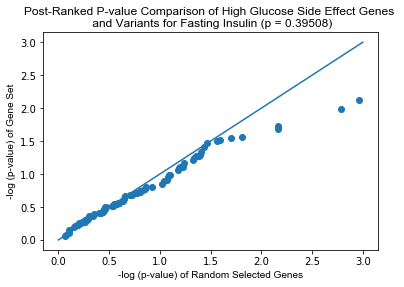

In [52]:
#want -  fast insulin
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[0][1].values)),( -np.log10(all_sorted_genes[2][4].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Fasting Insulin (''p'' = 0.39508)', **csfont )
plt.savefig('high_gluc_se_fasting2.png', dpi = 600)


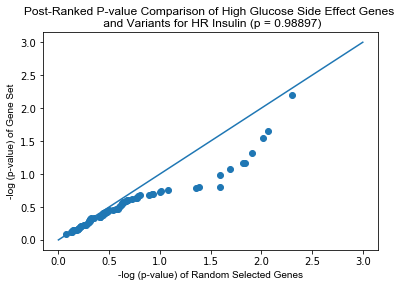

In [53]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[1][2].values)),( -np.log10(all_sorted_genes[3][5].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for HR Insulin (''p'' = 0.98897)', **csfont )
plt.savefig('high_gluc_se_hrinsulin2.png', dpi = 600)


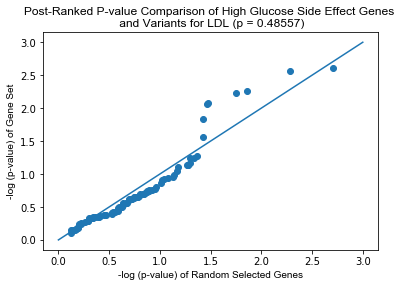

In [54]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[2][3].values)),( -np.log10(all_sorted_genes[4][6].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for LDL (''p'' = 0.48557)', **csfont )
plt.savefig('high_gluc_se_ldl2.png', dpi = 600)


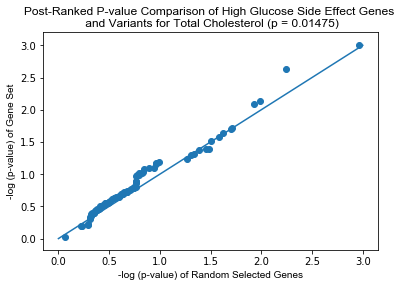

In [55]:
# want - tchol
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[3][4].values)),( -np.log10(all_sorted_genes[5][7].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Total Cholesterol (''p'' = 0.01475)', **csfont )
plt.savefig('high_gluc_se_tchol2.png', dpi = 600)


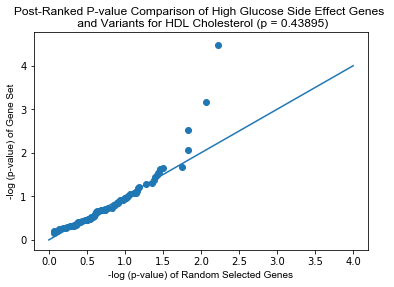

In [56]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[4][5].values)),( -np.log10(all_sorted_genes[6][8].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for HDL Cholesterol (''p'' = 0.43895)', **csfont )
plt.savefig('high_gluc_se_hdl2.png', dpi = 600)


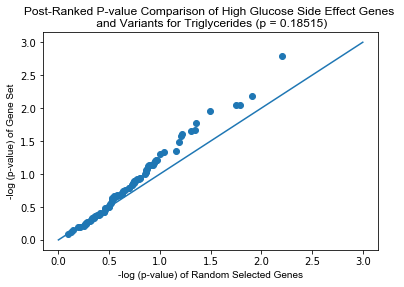

In [57]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[5][6].values)),( -np.log10(all_sorted_genes[7][9].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Triglycerides (''p'' = 0.18515)', **csfont )
plt.savefig('high_gluc_se_tri2.png', dpi = 600)


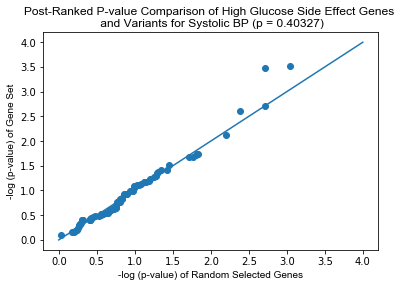

In [58]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[6][7].values)),( -np.log10(all_sorted_genes[8][10].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Systolic BP (''p'' = 0.40327)', **csfont )
plt.savefig('high_gluc_se_sbp2.png', dpi = 600)


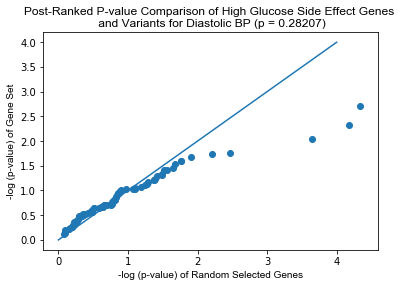

In [59]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[7][8].values)),( -np.log10(all_sorted_genes[9][11].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Diastolic BP (''p'' = 0.28207)', **csfont )
plt.savefig('high_gluc_se_dbp2.png', dpi = 600)


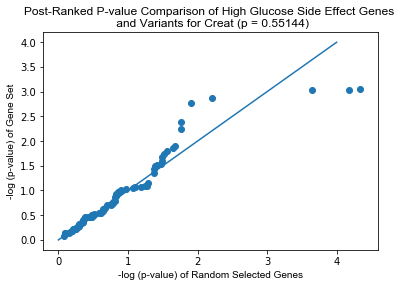

In [60]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[8][9].values)),( -np.log10(all_sorted_genes[10][12].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for Creat (''p'' = 0.55144)', **csfont )
plt.savefig('high_gluc_se_creat2.png', dpi = 600)

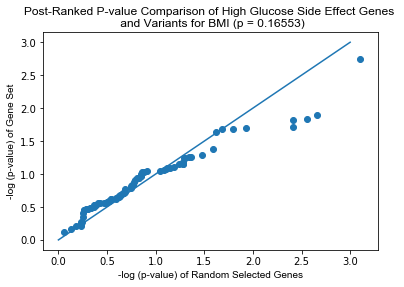

In [61]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[9][10].values)),( -np.log10(all_sorted_genes[11][13].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of High Glucose Side Effect Genes \n and Variants for BMI (''p'' = 0.16553)', **csfont )
plt.savefig('high_gluc_se_bmi2.png', dpi = 600)
